# Example quantitative plots

How to plot the results of the quantitative evaluation.

In [1]:
import os, sys
sys.path.append(os.getcwd() + "/../../modules")
sys.path.append(os.getcwd() + "/../../external")
sys.path.append(os.getcwd() + "/../..")
sys.path.append(os.getcwd() + "/../dataset")

import numpy as np
import fnmatch
import pandas as pd
import sklearn.metrics as sm
import scipy.stats as ss
import matplotlib.pyplot as plt

import dense_correspondence_manipulation.utils.utils as utils
utils.add_dense_correspondence_to_python_path()

from dense_correspondence.evaluation.evaluation import DenseCorrespondenceEvaluationPlotter as DCEP

If you have multiple networks trained, you can add them to the `nets_list` below, and they will be plotted together.

In [2]:
dc_source_dir = utils.getDenseCorrespondenceSourceDir()
path_to_nets = os.path.join(dc_source_dir, "pdc/trained_models/tutorials")

all_nets = sorted(os.listdir(path_to_nets))
nets_list = [
    "shirt_hanging_d16_contrastive_non_sym",
    "shirt_hanging_d16_contrastive_sym",
    "shirt_hanging_d16_distributional_non_sym",
    "shirt_hanging_d16_distributional_sym",
    "shirt_hanging_d16_distributional_sym_big",
#     "shirt_hanging_d9_contrastive_non_sym",
#     "shirt_hanging_d9_contrastive_sym",
#     "shirt_hanging_d9_distributional_non_sym",
#     "shirt_hanging_d9_distributional_sym"

]

# Training 
Evaluate the network on the training scenes. Correspondences are all within scene

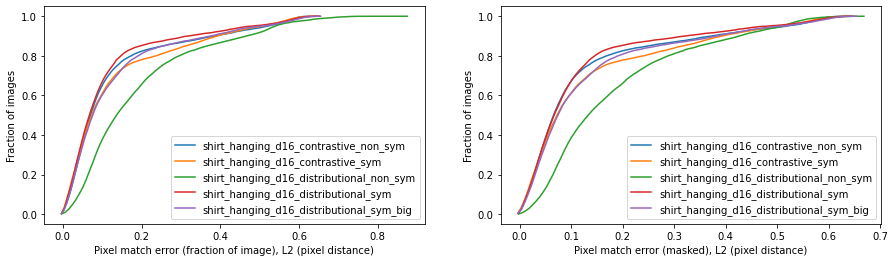

In [4]:
p = DCEP()
dc_source_dir = utils.getDenseCorrespondenceSourceDir()

network_name = nets_list[0]
path_to_csv = os.path.join(dc_source_dir, "pdc/trained_models/tutorials", network_name, "analysis/train/data.csv")
fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, save=False)

for network_name in nets_list[1:]:
    path_to_csv = os.path.join(dc_source_dir, "pdc/trained_models/tutorials", network_name, "analysis/train/data.csv")
    fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, previous_fig_axes=fig_axes, save=False)

_, axes = fig_axes
# axes[0].set_title("Training Set")
plt.show()

# Test
Evaluate the network on the test scenes. Correspondences are all within scene

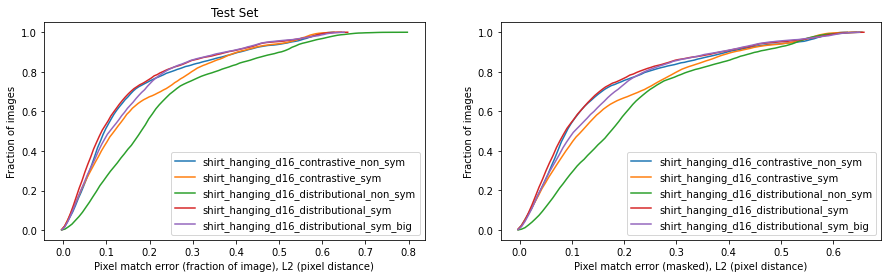

In [5]:
p = DCEP()
dc_source_dir = utils.getDenseCorrespondenceSourceDir()

network_name = nets_list[0]
path_to_csv = os.path.join(dc_source_dir, "pdc/trained_models/tutorials", network_name, "analysis/test/data.csv")
fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, save=False)

for i, network_name in enumerate(nets_list[1:]):
    path_to_csv = os.path.join(dc_source_dir, "pdc/trained_models/tutorials", network_name, "analysis/test/data.csv")
    fig_axes = DCEP.run_on_single_dataframe(path_to_csv, label=network_name, previous_fig_axes=fig_axes, save=False)

_, axes = fig_axes
axes[0].set_title("Test Set")
plt.show()